In [22]:
#TODO: import NumPy and matplotlib here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

df_penguins=pd.read_csv("penguins.csv")
# Preprocess the data (handle missing values)
df_penguins.dropna(inplace=True)

# Encoding species into numerical value
le = LabelEncoder()
df_penguins.species = le.fit_transform(df_penguins.species)
df_penguins.species.unique()
# Encoding categorical vairables 
df1 = pd.get_dummies(df_penguins[['island', 'sex']],
                    prefix = ['island', 'sex'] )
df2 = pd.concat([df_penguins, df1], axis=1)
df2.drop(['island', 'sex','rowid'], axis = 1, inplace = True)
df2.head()
# Defining x and y
X = df2.drop(['species','sex_female','sex_male','year'], axis= 1)
print(X)
y = df2['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state= 100) 



     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0              39.1           18.7              181.0       3750.0   
1              39.5           17.4              186.0       3800.0   
2              40.3           18.0              195.0       3250.0   
4              36.7           19.3              193.0       3450.0   
5              39.3           20.6              190.0       3650.0   
..              ...            ...                ...          ...   
339            55.8           19.8              207.0       4000.0   
340            43.5           18.1              202.0       3400.0   
341            49.6           18.2              193.0       3775.0   
342            50.8           19.0              210.0       4100.0   
343            50.2           18.7              198.0       3775.0   

     island_Biscoe  island_Dream  island_Torgersen  
0            False         False              True  
1            False         False              True  


In [26]:
##TODO##
# Instantiate the classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the classifier on the training data
model=knn.fit(X_train, y_train)

#Make a prediction on the training data
y_train_pred=model.predict(X_train)
knn_test= knn.predict(X_test)
print(f"Train accuracy: {accuracy_score(y_train,y_train_pred)}, Test accuracy: {accuracy_score(y_test,knn_test)}")


Train accuracy: 0.8669527896995708, Test accuracy: 0.78


Text(0, 0.5, 'Accuracy')

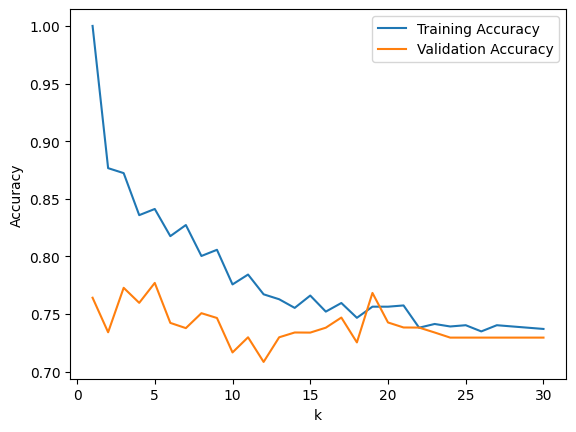

In [27]:
## Cross validation to decide the best value of k 

# Instantiate KFold with 5 splits. 
# Set the parameter random_state to help you reproduce your results if needed.
cv = KFold(n_splits=5,random_state=10, shuffle=True)

# Set a variable max_k to 30 
max_k = 30

# Inititalise two variables to store the 
# training accuracies and validation accuracies 
# (these need to store max_k*5 accuracies) 
trainaccuracy = [[] for _ in range(max_k)]
valaccuracy = [[] for _ in range(max_k)]

# Loop over the values of k: 
for k in range(max_k):
    
    # Instantiate a k-nn classifier (Use the sklearn classifier) with the current value of k 
    knn = KNeighborsClassifier(n_neighbors=k+1)
    # Loop over the cross-validation splits: 
    for train_index, val_index in cv.split(X_train):
        Xtrain, Xval, Ytrain, Yval = np.array(X_train)[train_index],\
            np.array(X_train)[val_index], np.array(y_train)[train_index], np.array(y_train)[val_index]
        # fit the model on the current split of data 
        model=knn.fit(Xtrain, Ytrain)
        # make predictions 
        Ypredtrain=model.predict(Xtrain)
        Ypredval=model.predict(Xval)
        # calculate training and validation accuracy and store 
        trainaccuracy[k].append(accuracy_score(Ytrain,Ypredtrain))
        valaccuracy[k].append(accuracy_score(Yval,Ypredval))

# Calculate the mean training and validation accuracies across splits for each k
mean_train_acc = np.mean(trainaccuracy, axis=1)
mean_val_acc = np.mean(valaccuracy, axis=1)

# Plot the mean training and validation accuracies. Which value of 𝑘 will you use? Why?
x = range(1, max_k+1)
plt.plot(x, mean_train_acc, label='Training Accuracy')
plt.plot(x, mean_val_acc, label='Validation Accuracy')
plt.legend()
plt.xlabel('k')
plt.ylabel('Accuracy')

In [35]:
knn = KNeighborsClassifier(n_neighbors=18)

#Fit the classifier on the training data
model=knn.fit(X_train, y_train)

#Make a prediction on the training data
y_train_pred=model.predict(X_train)
knn_test= knn.predict(X_test)
print(f"Train accuracy: {accuracy_score(y_train,y_train_pred)}, Test accuracy: {accuracy_score(y_test,knn_test)}")

Train accuracy: 0.7553648068669528, Test accuracy: 0.73
